# 4.1 선형회귀

In [37]:
import numpy as np
import numpy.random as rnd
import pandas as pd
import sklearn
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

In [8]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

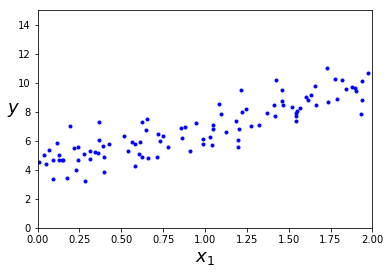

In [9]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

## 정규방정식

### 회귀 계수: $\hat{\theta} = (X^TX)^{-1}X^Ty$

In [22]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

### 회귀 직선: $\hat{y}=X\hat{\theta}$

In [15]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

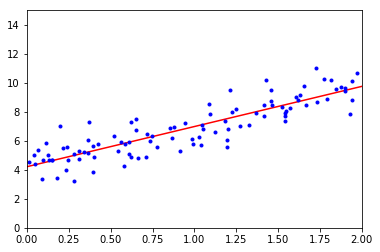

In [17]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

## Sklearn LinearRegression으로 회귀 계수 구하기

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [29]:
# 회귀 직선의 양 끝값
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

# 4.2 경사하강법

### 경사하강법

손실함수의 최솟값을 찾는 방법의 하나

### 기울기

모든 독립변수들에 대한 편미분들의 벡터

$$
\nabla f(x,y) = [\frac{\partial f}{\partial x}(x,y), \frac{\partial f}{\partial y}(x,y)]
$$

### 이상적인 학습율

1차원: $\frac{1}{f(x)''}$

2차원 이상: 헤세 행렬(Hessian Matrix): 각 변수에 대한 **이계도함수(2번 편미분한 함수)의 행렬**

# 4.3 다항 회귀

- 비선형 데이터를 학습시키는 데 선형 모델을 사용할 수 있다.
1. 각 특성의 제곱을 새로운 특성으로 추가
2. 확장된 훈련 데이터셋에 선형 모델 적용 $\longrightarrow$ **다항 회귀**

In [44]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + np.random.randn(m, 1) + 1*X + 0.5*X**2 

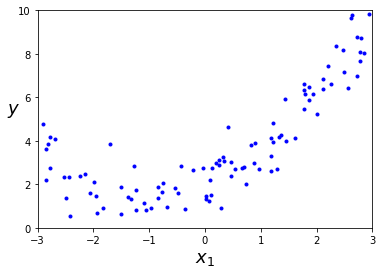

In [45]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

#### 각 특성의 제곱을 새로운 특성으로 추가

In [46]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.76886782])

In [47]:
X_poly[0]

array([1.76886782, 3.12889337])

#### 확장된 훈련 데이터셋에 선형 모델 적용

In [48]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.99958228]), array([[1.04630034, 0.5015459 ]]))

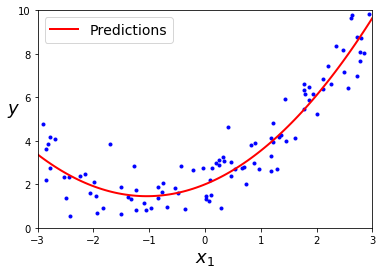

In [49]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# 4.4 학습 곡선

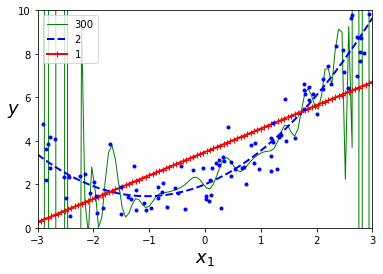

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features", polybig_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg),
    ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

- 과소적합(underfitting) : 1 (모델이 너무 단순함) **편향**이 큼
- 과대적합(overfitting) : 300 (모델이 너무 복잡함) **분산**이 큼

> 편향과 분산에는 트레이드오프 관계가 성립한다.
> - 적절한 지점을 찾는 것이 목표

# 4.5 규제가 있는 선형 모델

## 릿지 회귀 Ridge Regression

- $L_2\ \text{norm}$ (제곱) 정규화
- $\text{MSE}$를 최소화하면서, 회귀계수 $\beta$의 제곱합을 제한

In [54]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

### 릿지 회귀의 비용함수

$$
J(\theta) = \text{MSE}(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n}{\theta_i^2}
$$

- 특징 : 변수($x$)들 간 상관관계가 높은 상황(collinearity)에서 좋음
- 크기가 큰 변수의 계수를 더 빠르게 줄이는 경향이 있다.

- $\alpha$가 크면, 적은 변수 - 간단한 모델 - 쉬운 해석 but 큰 학습오차 - 과소적합 위험
- $\alpha$가 작으면, 많은 변수 - 복잡한 모델 - 어려운 해석 but 큰 분산 - 과대적합 위험

#### Ridge

In [55]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

#### SGD (확률적 경사하강법)

- penalty="l2": 릿지 회귀

In [59]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

## 라쏘 회귀 Lasso Regression

- LASSO: Least Absolute Shrinkage and Selection Operator
- $L_1\ \text{norm}$ (절댓값) 정규화
- $\text{MSE}$를 최소화하면서, 회귀계수 $\beta$의 절댓값 합을 제한

### 라쏘 회귀의 비용함수

$$
J(\theta) = \text{MSE}(\theta) + \alpha \sum_{i=1}^{n}{\vert \theta_i \vert}
$$

- 특징: 덜 중요한 factor 계수 $\beta$를 0으로 만들어 완전히 제거

- $\alpha$가 크면, 적은 변수 - 간단한 모델 - 쉬운 해석 but 큰 학습오차 - 과소적합 위험
- $\alpha$가 작으면, 많은 변수 - 복잡한 모델 - 어려운 해석 but 큰 분산 - 과대적합 위험

#### Lasso

In [61]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

#### SGD (확률적 경사하강법)

- penalty="l1" : 라쏘 회귀

In [62]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l1", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47011206])

## 엘라스틱 넷 Elastic Net

- 릿지와 라쏘를 절충한 회귀 모델
- 규제항은 릿지와 라쏘의 규제항을 더한 값
- 혼합 정도는 혼합비율 $r$로 조정
  + $r=0$ : 릿지 회귀
  + $r=1$ : 라쏘 회귀

- 주요 특징: 상관관계가 큰 변수들을 동시에 선택하거나 배제함 \
  $\longrightarrow$ **Grouping Effect**

### 엘라스틱넷의 비용함수

$$
J(\theta) = \text{MSE}(\theta) + r \alpha \sum_{i=1}^{n}{\vert \theta_i \vert} + (1-r) \alpha \frac{1}{2} \sum_{i=1}^{n}{\theta_i^2}
$$

- 유의미한 특성이 몇 개뿐이라고 생각될 때 : 라쏘, 엘라스틱넷 \
  ($\because$ 불필요한 특성의 계수 $\beta$를 0으로 만들기 때문)

#### ElasticNet

`l1_ ratio` : 혼합 비율 $r$

In [64]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## 조기 종료 Early Stopping

- 검증 에러가 최솟값에 도달하면 바로 훈련을 중지시키는 것
- epoch가 진행될수록 에러(RMSE)가 줄어들다가, 어느 시점부터 다시 상승한다.
  + **과대적합** Overfitting

TIP: 
- SGD/미니배치GD처럼 곡선이 매끄럽지 않아 최솟값에 도달했는지 확인이 어려울 때
- 검증 에러가 일정 시간동안 최솟값보다 클 때, 학습을 멈추고 검증 에러가 최소였을 때의 모델 파라미터로 되돌리기

# 4.6 로지스틱 회귀

### 로지스틱 회귀모델 필요성

- 지금까지의 선형 회귀모델은 종속변수 $y$가 연속형 변수일 때 적용 가능
- $y$가 범주형 변수라면 어떻게 회귀할 수 있을까?

#### 범주형 반응변수

- 이진변수 (반응변수 값: 0 or  1)
- 다변수 (반응변수 값: 1 or 2 or 3 이상)

### 로지스틱 회귀모델 사용법

- 새로운 관측치를 기존 범주 중 하나로 예측 (범주 예측 = 분류)

# Keras
## model.compile(loss='', optimizer='')

- sgd
- momentum
- Adagrad
- adam